**THIS CHAPTER IS UNDER CONSTRUCTION!!!**

(stat-infer)=
# Statistical inference

## Statistics and their distributions

```{prf:definition}
:label: statistic-def

Let $\bX$ be a $m$-dimensional random vector. A _statistic_ is a random variable of the form

$$
T = r(\bX),
$$

where $r:\bbr^m \to \bbr$ is a real-valued function. An observed value $t$ of $T$ is called an _observed statistic_ or _empirical statistic_.
```

If we conceptualize the components of a random vector $\bX$ as a dataset $X_1,X_2,\ldots,X_m$, then a statistic

$$
T = r(X_1,X_2,\ldots,X_m)
$$

is simply a function of the data. Crucially important examples of statistics include those defined as follows:

```{prf:definition}
:label: sample-mean-var-def

Let $\bX = (X_1,\ldots,X_m)$ be an $m$-dimensional random vector. The _sample mean_ is defined to be the statistic

$$
\overline{X} \def \frac{1}{m}(X_1+\cdots+X_m),
$$

while the _sample variance_ is defined to be the statistic

$$
S^2 \def \frac{1}{m-1} \sum_{i=1}^m(X_i - \overline{X})^2.
$$

The corresponding empirical statistics are the _empirical mean_ and _empirical variance_ defined as

$$
\overline{x} \def \frac{1}{m}(x_1+\cdots+x_m) \quad \text{and} \quad s^2 = \frac{1}{m-1} \sum_{i=1}^m(x_i - \overline{x})^2.
$$

```

Very often, the component random variables $X_1,X_2,\ldots,X_m$ of the random vector $\bX$ in the definition are assumed to form a random sample, i.e., an IID sequence of random variables. The dimension $m$ is then referred to as the _sample size_. In principle, then, the sample size $m$ can be _any_ positive integer, and so it is often convenient to write $\overline{X}_m$ for the sample mean, explicitly displaying the sample size. This gives us an entire _infinite sequence_ of sample means:

$$
\overline{X}_1,\overline{X}_2,\ldots,\overline{X}_m, \ldots.
$$ (seq-means-eqn)

Since statistics are random vectors, they have their own probability distributions. These are given special names:

```{prf:definition}
:label: samp-dist-def

The probability distribution of a statistic $T$ is called the _sampling distribution_ of $T$.
```

The sampling distributions for sample means $\overline{X}_m$ are particularly important, and one of the main goals of {numref}`large-sample` is to study the limiting behavior (or _asymptotic behavior_) of the sampling distributions in the sequence {eq}`seq-means-eqn` as $m\to \infty$.

In general, however, computing the sampling distributions is difficult. But if we actually have _observed_ data $x_1,x_2,\ldots,x_m$, then (as you will explore in the programming assignment) there is a resampling method known as _bootstrapping_ that yields  approximations to sampling distributions. An example is given by the histogram (with KDE) on the right-hand side of the following figure, where a histogram (with KDE) of the empirical distribution of an observed dataset is given on the left-hand side:

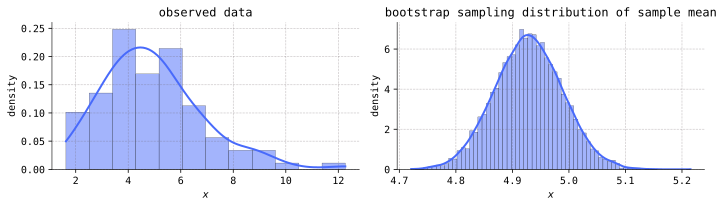

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib_inline.backend_inline
import matplotlib.colors as clr
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings("ignore")
blue = '#486AFB'
magenta = '#FD46FC'

np.random.seed(42)
X = sp.stats.gamma(a=5)

sample_size = 100
resample_size = 1000
random_sample = X.rvs(size=sample_size)
replicate_means = []
num_resamples = 10000

for _ in range(num_resamples):
    sample = np.random.choice(a=random_sample, size=resample_size, replace=True)
    replicate_means.append(sample.mean())

_, axes = plt.subplots(ncols=2, figsize=(10, 3))

sns.histplot(x=random_sample, ec='black', stat='density', kde=True, ax=axes[0])
sns.histplot(x=replicate_means, ec='black', stat='density', kde=True, ax=axes[1])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('density')
axes[0].set_title('observed data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('density')
axes[1].set_title('bootstrap sampling distribution of sample mean')
plt.tight_layout()

Observe that the sampling distribution on the right-hand side appears to be well approximated by a normal distribution. This is actually a manifestation of the asymptotic behavior of sample means that we alluded to above; indeed, as we will see in {numref}`large-sample`, the Central Limit Theorem tells us that the sequence {eq}`seq-means-eqn` of sample means converges (in distribution) to a normal distribution as $m\to \infty$, provided that the random variables are IID. This is true even though the observed data are definitely _not_ normally distributed. Moreover, the mean of the sampling distribution is approximately $4.924$, while the mean of the observed data is approximately $4.928$. The fact that these means are nearly equal is a consequence of another theorem in {numref}`large-sample` called the Law of Large Numbers.

Let's consider the sample mean a little closer:

```{prf:theorem} Properties of the sample mean
:label: prop-sample-mean-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a distribution with mean $\mu$ and standard deviation $\sigma$.

1. The expectation of the sample mean $\overline{X}$ is $\mu$.
2. The variance of the sample mean $\overline{X}$ is $\sigma^2/m$, and hence its standard deviation is $\sigma/\sqrt{m}$.
3. If the $X_i$'s are normally distributed, then so too is the sample mean $\overline{X}$.
```









(large-sample)=
## Large sample theory

```{prf:theorem} Central Limit Theorem
:label: clt-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a distribution with mean $\mu$ and standard deviation $\sigma$. Then, in the limit as $m\to \infty$, we have

$$
\lim_{m\to \infty} P \left( \frac{\overline{X} - \mu}{\sigma/\sqrt{m}} \leq z \right) = P(Z \leq z) = \Phi(z),
$$

where $Z \sim \mathcal{N}(0,1)$.
```








(CIs)=
## Confidence intervals

```{prf:theorem}
:label: standardized-mean-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a normal distribution with mean $\mu$ and standard deviation $\sigma$. Then the statistic

$$
\frac{\overline{X} - \mu}{\sqrt/\sqrt{m}}
$$

has a standard normal distribution. This statistic is called the _standardized mean_.
```

```{prf:theorem}
:label: CI-norm-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a normal distribution with **unknown** mean $\mu$ and **known** standard deviation $\sigma$, and let $\bar{x}$ be the empirical mean computed from an observed random sample. For $\alpha\in [0,1]$, the interval

$$
\left(\bar{x} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}}, \bar{x} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}} \right)
$$

is a $100(1-\alpha)\%$ confidence interval for the mean $\mu$.
```

```{prf:theorem}
:label: CI-large-sample-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a distribution with **unknown** mean $\mu$ and **known** standard deviation $\sigma$, and let $\bar{x}$ be the empirical mean computed from an observed random sample. For $\alpha\in [0,1]$ and $m$ sufficiently large, the random interval

$$
\left(\bar{x} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}}, \bar{x} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{m}} \right)
$$

is approximately a $100(1-\alpha)\%$ confidence interval for the mean $\mu$.
```

```{prf:definition}
:label: t-dist-defn

Let $\nu\geq 1$ be an integer. A continuous random variable $X$ is said to have a *$t$-distribution with $\nu$ degrees of freedom*, denoted

$$
X \sim t_{\nu},
$$

if its probability density function is given by

$$
f(x;\nu) = \frac{\Gamma\left(\frac{\nu+1}{2} \right)}{\Gamma\left( \frac{\nu}{2} \right) \sqrt{\nu\pi}}\left(1 + \frac{x^2}{\nu} \right)^{- \frac{\nu+1}{2}}
$$

with support $\bbr$.
```

```{prf:theorem}
:label: student-mean-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a normal distribution with mean $\mu$ and standard deviation $\sigma$, and let $\bar{x}$ and $s$ be the empirical mean and standard deviation computed from an observed random sample. Then the statistic

$$
\frac{\overline{X} - \mu}{s/\sqrt{m}}
$$

has a $t_{m-1}$ distribution. This statistic is called the _studentized mean_.
```

```{prf:theorem}
:label: t-CI-thm

Let $X_1,X_2,\ldots,X_m$ be an IID random sample from a normal distribution with **unknown** mean $\mu$ and **unknown** standard deviation $\sigma$, and let $\bar{x}$ and $s$ be the empirical mean and standard deviation computed from an observed random sample. For $\alpha \in [0,1]$, the interval

$$
\left( \overline{x} - t_{\alpha/2, m-1} \cdot \frac{s}{\sqrt{m}}, \overline{x} + t_{\alpha/2, m-1} \cdot \frac{s}{\sqrt{m}} \right)
$$

is a $100(1-\alpha)\%$ confidence interval for the mean $\mu$.
```





## Hypothesis tests

## Statistical inference in linear regression

Consider a simple linear regression model with parameters $\beta_0$, $\beta_1$, and $\sigma^2$. Given an observed dataset

$$
(x_1,y_1),(x_2,y_2),\ldots,(x_m,y_m) \in \bbr^2,
$$

we saw in {prf:ref}`mle-simple-lin-reg-cor` that the maximum likelihood estimates $\hat{\beta}_0 \def (\beta_0)_\text{MLE}^\star$ and $\hat{\beta}_1 \def (\beta_1)_\text{MLE}^\star$ for the "true" bias and slope terms $\beta_0$ and $\beta_1$ are

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^m \left(x_i - \bar{x} \right)\left( y_i - \bar{y} \right)}{\sum_{i=1}^m \left(x_i - \bar{x} \right)^2} \quad \text{and} \quad \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}.
$$

We also defined the _predicted values_ and _residuals_ by the equations

$$
\hat{y}_i = \beta_0 + \beta_1 x_i \quad \text{and} \quad r_i = y_i - \hat{y}_i.
$$

These definitions of $\hat{y}_i$ and $r_i$ suited our brief analysis in {numref}`Chapter %s <prob-models>`. However, in order to obtain their values, we would need to know the "true" values of $\beta_0$ and $\beta_1$. But presumably we don't know these values! So, our discussion in this section begins with alternate definitions of these quantities based on the MLEs for the bias and slope terms:

```{prf:definition}
:label: predict-resid-defn

Letting the notation be as above, we define the *$i$-th predicted value* and *$i$-th residual* to be

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \quad \text{and} \quad r_i = y_i - \hat{y}_i,
$$

for each $i=1,2,\ldots,m$.
```


```{prf:definition}
:label: slope-estimator-defn

Let

$$
(X_1,Y_1),(X_2,Y_2),\ldots,(X_m,Y_m)
$$

be an IID random sample, and suppose values $x_1,x_2,\ldots,x_m$ are observed. Then the statistic

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^m (x_i - \bar{x})(Y_i - \overline{Y})}{S_{xx}}
$$

is called the _slope estimator_ of the corresponding linear regression model, where we write

$$
S_{xx} = \sum_{i=1}^m(x_i - \bar{x})^2.
$$
```

```{prf:theorem}
:label: slope-estimator-thm

Consider a linear regression model with parameters $\beta_0$, $\beta_1$, and $\sigma^2$. Let $\hat{\beta}_1$ be the slope estimator defined in {prf:ref}`slope-estimator-defn`.

1. We have $E(\hat{\beta}_1) = \beta_1$.

2. We have $V(\hat{\beta}_1) = \sigma^2 / S_{xx}$.

3. The sampling distribution of $\hat{\beta}_1$ is normal.
```






## Analysis of variance

```{prf:definition}
:label: categorical-defn

Let $n\geq 1$ be an integer and let $\btheta^\intercal =(\theta_1,\ldots,\theta_n)$ be a vector such that $0\leq \theta_j \leq 1$ for each $j=1,\ldots,n$ and $\sum_{j=1}^n \theta_j = 1$. A discrete random variable $X$ is said to have a _categorical distribution_ with parameter $\btheta$, denoted

$$
X \sim \Cat(\btheta),
$$

if its probability mass function is given by

$$
p(x;\btheta) = \theta_x
$$

if $x\in \{1,2,\ldots,n\}$, and $p(x;\btheta)=0$ otherwise.
```

````{prf:definition}
:label: anova-defn

An _analysis of variance model_, or _ANOVA model_, is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/anova.svg
:width: 25%
:align: center
```
&nbsp;

The model has the following parameters:

* A parameter vector $\btheta \in \bbr^n$ such that $X \sim \Cat(\btheta)$.
* A parameter vector $\bmu \in \bbr^n$.
* A positive real parameter $\sigma^2>0$.

The link function at $Y$ is given by

$$
Y \mid X \sim \mathcal{N}(\mu,\sigma^2), \quad \text{where} \quad \mu = \mu(x) = \mu_x,
$$

and $\bmu^\intercal = (\mu_1,\mu_2,\ldots,\mu_{n})$.
````